Practice Project - 6

# Advertising Sales Channel Prediction

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.

In [1]:
# Import Necessary Libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dataset
df_adv=pd.read_csv("Advertising.csv",index_col=0)
df_adv

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [3]:
# First 5 rows
df_adv.head(5)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
# Last 5 rows
df_adv.tail(5)

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [5]:
# Sample
df_adv.sample(4)

,TV,radio,newspaper,sales
125,229.5,32.3,74.2,19.7
184,287.6,43.0,71.8,26.2
127,7.8,38.9,50.6,6.6
164,163.5,36.8,7.4,18.0


In [6]:
df_adv.shape

(200, 4)

This dataset contains 200 rows and 5 columns.

# EDA

In [7]:
# Column Names
df_adv.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [8]:
# Column Data Types
df_adv.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [9]:
# Checking for null values
df_adv.isnull()

,TV,radio,newspaper,sales
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
...,...,...,...,...
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False
199,False,False,False,False


In [10]:
# Sum of null values if any...
df_adv.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

There are no null or missing values in this dataset.

In [11]:
df_adv.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [12]:
# Mean of our target variable 'sales'
df_adv.groupby('sales').mean()

,TV,radio,newspaper
sales,,,
1.6,0.70,39.600000,8.7
3.2,4.10,11.600000,5.7
4.8,8.60,2.100000,1.0
5.3,9.25,15.150000,17.5
5.5,7.30,28.100000,41.4
...,...,...,...
24.7,220.30,49.000000,3.2
25.4,266.60,45.033333,33.5
25.5,283.60,42.000000,66.2


In [13]:
df_adv.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

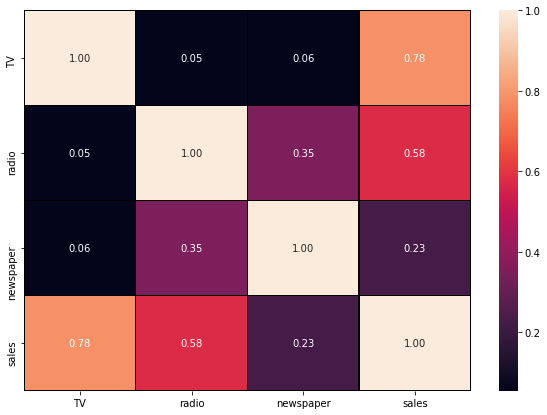

In [14]:
# Visualizing df_adv.corr() using heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df_adv.corr(),annot=True,linewidths=0.1,linecolor="black",fmt=".2f")

From the above visualization, we can see that the strongly correlated columns include: TV and sales, radio and sales, radio and newspaper, followed by newspaper and sales.

Also, from the visualization, the weakly correlated columns include: TV and radio, TV and newspaper and vice versa.

In [15]:
df_adv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [16]:
# Unique values of columns
df_adv.nunique()

TV           190
radio        167
newspaper    172
sales        121
dtype: int64

In [17]:
# Unique values of target variable column
df_adv['sales'].unique()

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. ,  5.6,
       15.5, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,  9.5, 12.8,
       25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7,  8.5, 14.9, 23.2, 14.8,
       11.4, 10.7, 22.6, 21.2, 20.2, 23.7,  5.5, 23.8, 18.4,  8.1, 24.2,
       15.7, 14. , 13.4, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 12.3, 13.6, 21.7, 15.2, 16. , 16.7, 11.2,  7.3, 19.4,
       22.2, 11.5, 16.9, 11.7, 17.2, 19.2, 19.8, 21.8, 14.1, 12.6, 12.2,
        9.4,  6.6,  7. , 11.6, 19.7, 24.7,  1.6, 12.7,  5.7, 19.6, 10.8,
       20.8, 10.9, 20.1, 10.3, 16.1, 15.6,  3.2, 15.3, 14.4, 13.3,  8. ,
        8.4, 14.5,  7.6, 27. , 26.2, 17.6, 17.3,  6.7,  9.9,  5.9, 25.5])

In [18]:
df_adv['sales'].value_counts()

9.7     5
15.9    4
11.7    4
12.9    4
20.7    3
       ..
25.5    1
15.6    1
17.6    1
3.2     1
20.8    1
Name: sales, Length: 121, dtype: int64

# Data Visualization

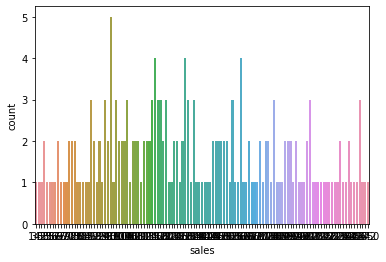

In [19]:
sns.countplot(df_adv['sales'])
plt.show()

<AxesSubplot:xlabel='sales', ylabel='Density'>

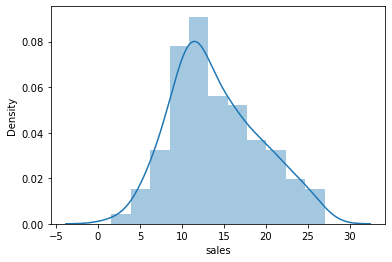

In [20]:
sns.distplot(df_adv['sales'])

<AxesSubplot:xlabel='TV', ylabel='Density'>

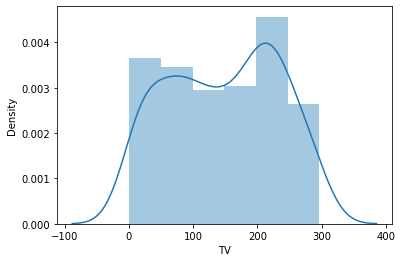

In [21]:
sns.distplot(df_adv['TV'])

<AxesSubplot:xlabel='radio', ylabel='Density'>

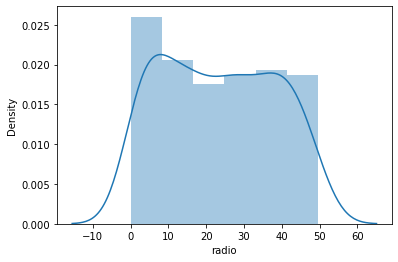

In [22]:
sns.distplot(df_adv['radio'])

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

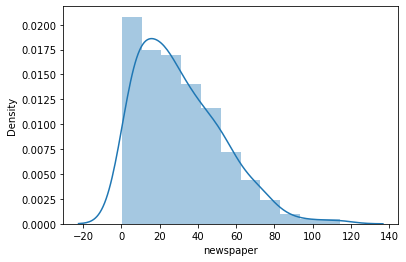

In [23]:
sns.distplot(df_adv['newspaper'])

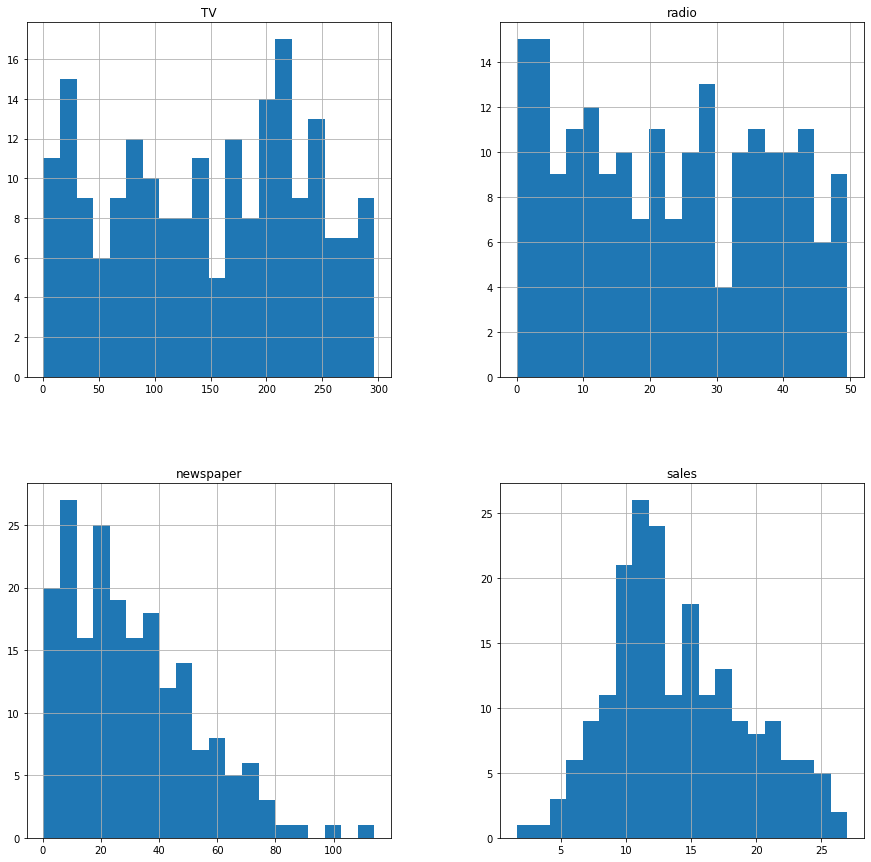

In [24]:
df_adv.hist(figsize=(15,15),bins=20)
plt.show()

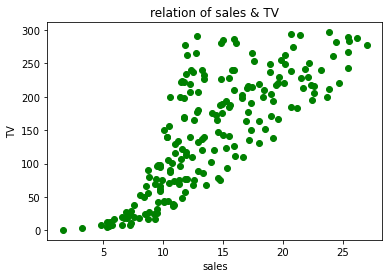

In [25]:
plt.scatter(df_adv['sales'], df_adv['TV'], color = 'green')
plt.title('relation of sales & TV')
plt.xlabel('sales')
plt.ylabel('TV')
plt.show()

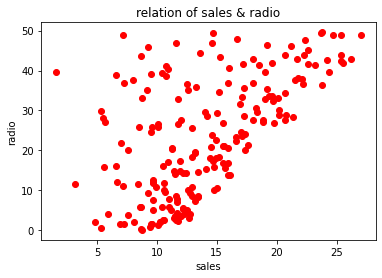

In [26]:
plt.scatter(df_adv['sales'], df_adv['radio'], color = 'red')
plt.title('relation of sales & radio')
plt.xlabel('sales')
plt.ylabel('radio')
plt.show()

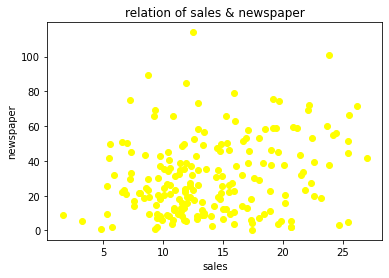

In [27]:
plt.scatter(df_adv['sales'], df_adv['newspaper'], color = 'yellow')
plt.title('relation of sales & newspaper')
plt.xlabel('sales')
plt.ylabel('newspaper')
plt.show()

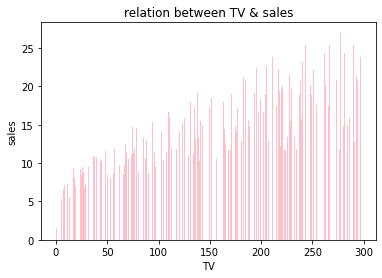

In [28]:
plt.bar(df_adv['TV'], df_adv['sales'], color = 'pink')
plt.title('relation between TV & sales')
plt.xlabel('TV')
plt.ylabel('sales')
plt.show()

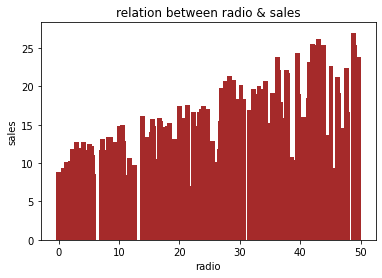

In [29]:
plt.bar(df_adv['radio'], df_adv['sales'], color = 'brown')
plt.title('relation between radio & sales')
plt.xlabel('radio')
plt.ylabel('sales')
plt.show()

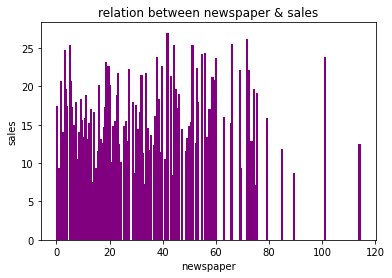

In [30]:
plt.bar(df_adv['newspaper'], df_adv['sales'], color = 'purple')
plt.title('relation between newspaper & sales')
plt.xlabel('newspaper')
plt.ylabel('sales')
plt.show()

# VIF

In [31]:
vif_data= df_adv.drop('sales',axis=1)

In [32]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_adv_sc= sc.fit_transform(vif_data)

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
VIF= pd.DataFrame()
VIF['features']= vif_data.columns

In [35]:
VIF['VIF']= [variance_inflation_factor(df_adv_sc,i ) for i in range(len(vif_data.columns))]

In [36]:
VIF

,features,VIF
0,TV,1.004611
1,radio,1.144952
2,newspaper,1.145187


After performing VIF, we conclude that : No multicolinearity is found between the independent variables "TV","radio","newspaper". The safe range is between -5 to +5.

# Outliers

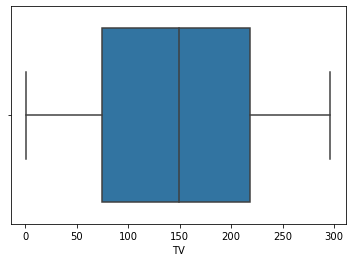

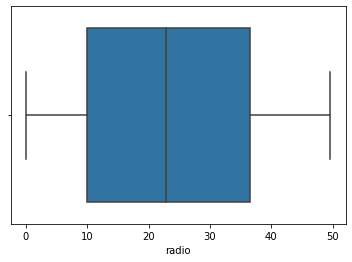

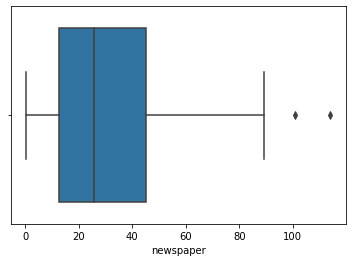

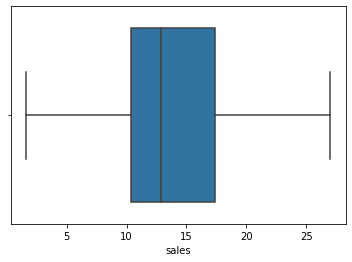

In [37]:
for i in df_adv.columns:
    sns.boxplot(df_adv[i])
    plt.show()

We can see there are some outliers present in "newspaper".

# Removing Outliers

We shall remove the outliers using Z-Score.

In [38]:
from scipy.stats import zscore

z=np.abs(zscore(df_adv))
threshold=3
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


In [39]:
# New data frame
df_new_adv=df_adv[(z<3).all(axis=1)]
df_new_adv

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [40]:
df_new_adv.shape

(198, 4)

In [41]:
df_adv.shape

(200, 4)

In [42]:
Data_loss=((200-198)/200)*100
Data_loss

1.0

Data loss after removing outliers is 1 %.

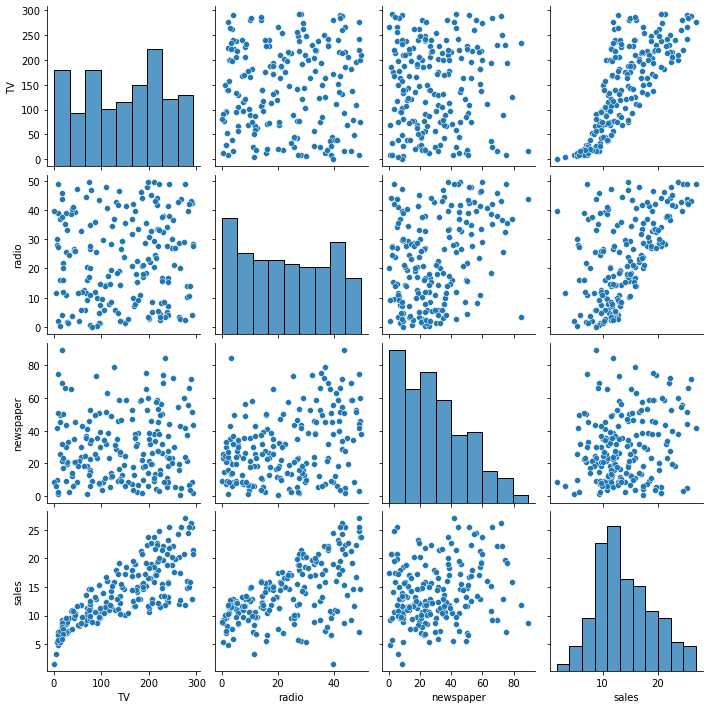

In [43]:
sns.pairplot(df_new_adv)

# Skewness

In [44]:
df_new_adv.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

Using Power Transform to remove skewness.

In [45]:
from sklearn.preprocessing import power_transform
df_adv_new=power_transform(df_new_adv)

In [46]:
df_new_adv

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [47]:
type(df_adv_new)

numpy.ndarray

In [48]:
df_adv.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [49]:
df_advt=pd.DataFrame(df_adv_new,columns=df_adv.columns)

In [50]:
df_advt.skew()

TV          -0.320682
radio       -0.236668
newspaper   -0.101288
sales       -0.007573
dtype: float64

In [51]:
df_advt[np.abs(df_advt)>0.25].all()

TV           True
radio        True
newspaper    True
sales        True
dtype: bool

# Model Building & Tuning

In [52]:
x= df_advt.drop('sales',axis=1)
y= df_advt['sales']

In [53]:
x.shape

(198, 3)

In [54]:
y.shape

(198,)

In [55]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=44)

In [57]:
x_train.shape

(158, 3)

In [58]:
x_test.shape

(40, 3)

In [59]:
y_train.shape

(158,)

In [60]:
y_test.shape

(40,)

# Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [62]:
lr.coef_

array([0.79772869, 0.50808788, 0.01273229])

In [63]:
lr.intercept_

0.0011865516788926167

In [64]:
lr.score(x_train,y_train)

0.9094136034860139

In [65]:
# Predicting the value
pred_lr=lr.predict(x_test)
print("Predicted value: ",pred_lr)
print("Actual value: ",y_test)

Predicted value:  [-1.02568184 -1.05099501  0.86038619 -0.19450124 -0.70487785 -0.81417151
 -0.8655806   0.9769531  -0.24915636 -0.68032533 -0.27441487  0.71449991
 -0.77100416 -1.42253775  0.57828066  1.12868136 -0.62369751  0.22050467
 -0.22722753 -0.92004808 -0.77635658  1.42340786 -1.53330208 -0.30696675
 -1.30990238 -1.09021938 -0.62552918  0.14813723  0.25743894 -0.41632812
  0.30542179 -0.81854367 -1.03719764  0.96204301 -1.01857828 -0.81797368
  1.36106177  0.27000085 -1.25096326  0.5757946 ]
Actual value:  48    -0.799286
23    -0.799286
58     0.875514
133   -0.390911
89    -0.474362
136   -0.821680
45    -0.601966
32     0.704062
95    -0.370242
134   -0.844172
9     -0.601966
3      0.892431
138   -0.537789
180   -1.027835
111    0.438521
107    1.108778
81    -0.453381
118    0.365876
114   -0.268015
156   -1.367150
12    -0.912255
46     1.646560
115   -0.866765
87    -0.127879
170   -1.292322
127   -0.799286
149   -0.390911
112    0.199362
108   -0.029786
79    -0.349649

In [66]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print('Error:')

print('Mean absolute error: ',mean_absolute_error(y_test,pred_lr))
print('Mean squared error: ',mean_squared_error(y_test,pred_lr))

print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_lr)))

Error:
Mean absolute error:  0.2238328510872129
Mean squared error:  0.07743767419641473
Root Mean squared error:  0.27827625517894033


In [67]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred_lr))

0.8679366191400842


In [68]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(lr,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.8985582344321446

# Lasso Regression

In [69]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

ls= Lasso()
parameters1 = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10)),'selection':['cyclic','random']}
gd1= GridSearchCV(ls,parameters1)
gd1.fit(x_train,y_train)

print(gd1.best_params_)

{'alpha': 0.01, 'random_state': 9, 'selection': 'random'}


In [70]:
ls1 = Lasso(alpha=0.01,random_state=9,selection='random')
ls1.fit(x_train,y_train)

Lasso(alpha=0.01, random_state=9, selection='random')

In [71]:
ls1.score(x_train,y_train)

0.9092045637715507

In [72]:
ls1.coef_

array([0.78855215, 0.50187528, 0.00553594])

In [73]:
pred_ls=ls1.predict(x_test)
print("Predicted value: ",pred_ls)
print("Actual value: ",y_test)

Predicted value:  [-1.01637851 -1.03504295  0.85847902 -0.18410545 -0.68811459 -0.80218211
 -0.85774418  0.982645   -0.23524903 -0.66469751 -0.26822374  0.69767142
 -0.75587288 -1.40629847  0.57899119  1.12638536 -0.61796287  0.21255839
 -0.22362189 -0.91482504 -0.77750247  1.41016819 -1.50976832 -0.31481843
 -1.29060429 -1.08191854 -0.6238876   0.14384874  0.24709149 -0.409636
  0.30400636 -0.81286298 -1.02990321  0.95030311 -0.9929347  -0.80749213
  1.33677496  0.26300657 -1.22865233  0.56310583]
Actual value:  48    -0.799286
23    -0.799286
58     0.875514
133   -0.390911
89    -0.474362
136   -0.821680
45    -0.601966
32     0.704062
95    -0.370242
134   -0.844172
9     -0.601966
3      0.892431
138   -0.537789
180   -1.027835
111    0.438521
107    1.108778
81    -0.453381
118    0.365876
114   -0.268015
156   -1.367150
12    -0.912255
46     1.646560
115   -0.866765
87    -0.127879
170   -1.292322
127   -0.799286
149   -0.390911
112    0.199362
108   -0.029786
79    -0.349649
1

In [74]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print('Error:')

print('Mean absolute error: ',mean_absolute_error(y_test,pred_ls))
print('Mean squared error: ',mean_squared_error(y_test,pred_ls))

print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_ls)))

Error:
Mean absolute error:  0.22131527917248855
Mean squared error:  0.07611063767614934
Root Mean squared error:  0.275881564581886


In [75]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred_ls))

0.8701997672938667


In [76]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(ls1,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.8991525136793875

# Ridge Regression

In [77]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

rd = Ridge()
parameters2 = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10)),'solver':['auto','svg']}
gd2= GridSearchCV(rd,parameters2)
gd2.fit(x_train,y_train)

print(gd2.best_params_)

{'alpha': 1, 'random_state': 0, 'solver': 'auto'}


In [78]:
rd1 = Ridge(alpha=1,random_state=0,solver='auto')
rd1.fit(x_train,y_train)

Ridge(alpha=1, random_state=0)

In [79]:
rd1.score(x_train,y_train)

0.9093821891191114

In [80]:
rd1.coef_

array([0.79284079, 0.50511964, 0.01392446])

In [81]:
pred_rd=rd1.predict(x_test)
print("Predicted value: ",pred_rd)
print("Actual value: ",y_test)

Predicted value:  [-1.01841761 -1.0447155   0.85429766 -0.19408518 -0.70163746 -0.80904923
 -0.8593766   0.96849397 -0.24915087 -0.6768993  -0.27282096  0.71234544
 -0.76684707 -1.41331161  0.57399117  1.12045106 -0.61903771  0.22073882
 -0.22546809 -0.91279027 -0.769137    1.41479465 -1.52453131 -0.30243057
 -1.30206059 -1.08224344 -0.6201878   0.14838864  0.25769877 -0.41350992
  0.30362844 -0.81229962 -1.02940162  0.95685351 -1.01424616 -0.81270104
  1.35489723  0.26950933 -1.24410068  0.57391382]
Actual value:  48    -0.799286
23    -0.799286
58     0.875514
133   -0.390911
89    -0.474362
136   -0.821680
45    -0.601966
32     0.704062
95    -0.370242
134   -0.844172
9     -0.601966
3      0.892431
138   -0.537789
180   -1.027835
111    0.438521
107    1.108778
81    -0.453381
118    0.365876
114   -0.268015
156   -1.367150
12    -0.912255
46     1.646560
115   -0.866765
87    -0.127879
170   -1.292322
127   -0.799286
149   -0.390911
112    0.199362
108   -0.029786
79    -0.349649

In [82]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print('Error:')

print('Mean absolute error: ',mean_absolute_error(y_test,pred_rd))
print('Mean squared error: ',mean_squared_error(y_test,pred_rd))

print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_rd)))

Error:
Mean absolute error:  0.22201852253040064
Mean squared error:  0.0765448263627427
Root Mean squared error:  0.2766673568795977


In [83]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred_rd))

0.8694592953404193


In [84]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(rd1,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.8986845900483044

# Random Forest Regressor

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse','mae'], 'max_features':["auto", "sqrt","log2"],'min_samples_split': [0,1,2,3],'min_samples_leaf':[0,1,2]}
rfr =RandomForestRegressor()
gd3= GridSearchCV(rfr,parameters)
gd3.fit(x_train,y_train)

print(gd3.best_params_)

{'criterion': 'mae', 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3}


In [86]:
rf = RandomForestRegressor(criterion="mae",max_features="auto",min_samples_leaf=1,min_samples_split=3)
rf.fit(x_train, y_train)

RandomForestRegressor(criterion='mae', min_samples_split=3)

In [87]:
rf.score(x_train, y_train)

0.9955331507245506

In [88]:
pred_rfr = rf.predict(x_test)
print("Predicted value: ",pred_rfr)
print("Actual value: ",y_test)

Predicted value:  [-0.77897411 -0.77512305  0.82802102 -0.35097084 -0.50479175 -0.69551858
 -0.72307709  0.3896611  -0.30079332 -1.28538104 -0.39513037  0.8035141
 -0.43265283 -1.07767757  0.39589084  1.0487893  -0.43253446  0.30239853
 -0.11730311 -1.58972557 -1.14195632  1.61298398 -0.98525054 -0.22558035
 -1.37280391 -0.80403374 -0.43917541  0.04738636 -0.17387096 -0.35647007
 -0.32204295 -0.47734303 -1.34064934  0.43002268 -1.36312289 -0.64682706
  1.20612922 -0.32890686 -2.2499591   0.38648529]
Actual value:  48    -0.799286
23    -0.799286
58     0.875514
133   -0.390911
89    -0.474362
136   -0.821680
45    -0.601966
32     0.704062
95    -0.370242
134   -0.844172
9     -0.601966
3      0.892431
138   -0.537789
180   -1.027835
111    0.438521
107    1.108778
81    -0.453381
118    0.365876
114   -0.268015
156   -1.367150
12    -0.912255
46     1.646560
115   -0.866765
87    -0.127879
170   -1.292322
127   -0.799286
149   -0.390911
112    0.199362
108   -0.029786
79    -0.349649


In [89]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print('Error:')

print('Mean absolute error: ',mean_absolute_error(y_test,pred_rfr))
print('Mean squared error: ',mean_squared_error(y_test,pred_rfr))

print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_rfr)))

Error:
Mean absolute error:  0.12930802919461543
Mean squared error:  0.031063718972136223
Root Mean squared error:  0.1762490254501744


In [90]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred_rfr))

0.9470234638099119


In [91]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(rf,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.9699344790469169

# Decision Tree Regressor

In [92]:
from sklearn.tree import DecisionTreeRegressor

parameters3 = {'criterion':['squared_error','absolute_error'], 'max_features':["auto", "sqrt","log2"],'min_samples_split': [0,1,2,3],'random_state':[0,1,2]}
dtr = DecisionTreeRegressor()
gd4= GridSearchCV(dtr,parameters3)
gd4.fit(x_train,y_train)

print(gd4.best_params_)

{'criterion': 'absolute_error', 'max_features': 'auto', 'min_samples_split': 3, 'random_state': 2}


In [93]:
dt = DecisionTreeRegressor(criterion="absolute_error",max_features="auto",min_samples_leaf=3,random_state=2)
dt.fit(x_train,y_train)
dt.score(x_train,y_train)

0.9856991005921063

In [94]:
pred_dtr=dt.predict(x_test)
print("Predicted value: ",pred_dtr)
print("Actual value: ",y_test)

Predicted value:  [-0.44293048 -0.44293048  0.69537095  0.21808045 -0.62352924 -0.71066991
 -0.81048273  0.27390589 -0.10826191 -1.01616766 -0.40128402  0.80743899
 -0.44293048 -1.1343877   0.27390589  0.95969583 -0.44293048  0.63424636
 -0.06882982 -1.54681402 -1.01616766  1.53108825 -1.0045007  -0.18752522
 -1.53375172 -0.44293048 -0.62352924  0.21808045 -0.23777902 -0.18752522
 -0.40128402 -0.44293048 -1.39237187  0.43852137 -1.39237187 -0.62352924
  1.21447755 -0.40128402 -2.55909057  0.33836422]
Actual value:  48    -0.799286
23    -0.799286
58     0.875514
133   -0.390911
89    -0.474362
136   -0.821680
45    -0.601966
32     0.704062
95    -0.370242
134   -0.844172
9     -0.601966
3      0.892431
138   -0.537789
180   -1.027835
111    0.438521
107    1.108778
81    -0.453381
118    0.365876
114   -0.268015
156   -1.367150
12    -0.912255
46     1.646560
115   -0.866765
87    -0.127879
170   -1.292322
127   -0.799286
149   -0.390911
112    0.199362
108   -0.029786
79    -0.349649

In [95]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print('Error:')

print('Mean absolute error: ',mean_absolute_error(y_test,pred_dtr))
print('Mean squared error: ',mean_squared_error(y_test,pred_dtr))

print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_dtr)))

Error:
Mean absolute error:  0.21048077839952226
Mean squared error:  0.06659797795810193
Root Mean squared error:  0.25806584035494107


In [96]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred_dtr))

0.8864228010609816


In [97]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(dt,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.9324961386423102

# KNeighbors Regressor

In [98]:
from sklearn import neighbors

parameters4 = {'n_neighbors':[2,3,4,5,6,7,8,9],'weights':['uniform','distance'],'algorithm':['auto','kd_tree','ball_tree'],'p':[0,1,2]}
knn=neighbors.KNeighborsRegressor()
gd5=GridSearchCV(knn,parameters4)
gd5.fit(x_train,y_train)

print(gd5.best_params_)

{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


In [99]:
kn=neighbors.KNeighborsRegressor(n_neighbors=5,algorithm='auto',p=1,weights='distance')
kn.fit(x_train,y_train)
kn.score(x_train,y_train)

1.0

In [100]:
pred_knn = kn.predict(x_test)
print("Predicted value: ",pred_knn)
print("Actual value: ",y_test)

Predicted value:  [-0.58592864 -0.95608891  0.67276018 -0.95578553 -0.66247761 -0.69345552
 -0.46489139  0.62104548 -0.38861138 -1.29109672 -0.32151609  0.85436358
 -0.4416786  -1.16333881  0.60062633  1.06495217 -0.31623234  0.58060665
 -0.11629678 -1.36867959 -0.79189116  1.42094662 -1.05852784  0.04610042
 -1.09242023 -0.87105727 -0.4652472   0.25133735 -0.13340665 -0.47579648
 -0.20342226 -0.35626749 -1.33319441  0.54236045 -1.41608483 -0.71285615
  1.16235441 -0.31383207 -1.79186581  0.51643414]
Actual value:  48    -0.799286
23    -0.799286
58     0.875514
133   -0.390911
89    -0.474362
136   -0.821680
45    -0.601966
32     0.704062
95    -0.370242
134   -0.844172
9     -0.601966
3      0.892431
138   -0.537789
180   -1.027835
111    0.438521
107    1.108778
81    -0.453381
118    0.365876
114   -0.268015
156   -1.367150
12    -0.912255
46     1.646560
115   -0.866765
87    -0.127879
170   -1.292322
127   -0.799286
149   -0.390911
112    0.199362
108   -0.029786
79    -0.349649

In [101]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print('Error:')

print('Mean absolute error: ',mean_absolute_error(y_test,pred_knn))
print('Mean squared error: ',mean_squared_error(y_test,pred_knn))

print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_knn)))

Error:
Mean absolute error:  0.17177942659408582
Mean squared error:  0.04487633413984776
Root Mean squared error:  0.21184035059413908


In [102]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred_knn))

0.9234672209798632


In [103]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(kn,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.9411947430219236

# SVR

In [104]:
from sklearn.svm import SVR

parameters5={'kernel':['linear','poly','rbf'],'degree':[0,1,2,3,4],'gamma':['scale','auto'],'coef0':[0.0,0.1,0.2,0.3]}
svr=SVR()
gd6=GridSearchCV(svr,parameters5)
gd6.fit(x_train,y_train)

print(gd6.best_params_)

{'coef0': 0.3, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}


In [105]:
sv=SVR(coef0=0.3,degree=3,gamma='scale',kernel='poly')
sv.fit(x_train,y_train)

SVR(coef0=0.3, kernel='poly')

In [106]:
sv.score(x_train,y_train)

0.9885500808903056

In [107]:
pred_svr = sv.predict(x_test)
print("Predicted value: ",pred_svr)
print("Actual value: ",y_test)

Predicted value:  [-0.73579783 -0.76840891  0.81088526 -0.24570589 -0.53039789 -0.84019101
 -0.56964738  0.69201507 -0.50278841 -1.0351435  -0.50508636  0.87452649
 -0.54906236 -0.98672666  0.41353491  0.98556347 -0.46273997  0.26582348
 -0.15011369 -1.50860258 -1.07401245  1.56033176 -0.98049315 -0.17196921
 -1.49661419 -0.81652732 -0.42944124  0.27121445 -0.02432925 -0.30545011
 -0.29557136 -0.60586756 -1.24082377  0.70806884 -1.12922798 -0.64461408
  1.29198863 -0.22267622 -1.98492451  0.33248595]
Actual value:  48    -0.799286
23    -0.799286
58     0.875514
133   -0.390911
89    -0.474362
136   -0.821680
45    -0.601966
32     0.704062
95    -0.370242
134   -0.844172
9     -0.601966
3      0.892431
138   -0.537789
180   -1.027835
111    0.438521
107    1.108778
81    -0.453381
118    0.365876
114   -0.268015
156   -1.367150
12    -0.912255
46     1.646560
115   -0.866765
87    -0.127879
170   -1.292322
127   -0.799286
149   -0.390911
112    0.199362
108   -0.029786
79    -0.349649

In [108]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print('Error:')

print('Mean absolute error: ',mean_absolute_error(y_test,pred_svr))
print('Mean squared error: ',mean_squared_error(y_test,pred_svr))

print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_svr)))

Error:
Mean absolute error:  0.07620866819835467
Mean squared error:  0.009809627910698015
Root Mean squared error:  0.09904356572083829


In [109]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred_svr))

0.9832705121853395


In [110]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(sv,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.9831232632222777

From the above regression models, we see that Linear Regression, Lasso Regression, and, Ridge Regression have almost similar Cross Validation Scores and R2 Scores, all below 90 % and in the range 86 - 90 %.

From the rest of the regression models,  

We see that the highest cross validation score and R2 score after hyper parameter tuning using Grid Search CV belongs to SVR, followed by Random Forest Regressor & KNearest Neighbors Regressor.  


# Model Saving

Since SVR model is showing the highest Cross Validation Score and R2 Score, we will save the SVR Model.

In [112]:
import pickle
filename='Advt_Sales_Channel_Pred.pkl'
pickle.dump(sv,open(filename,'wb'))